<a href="https://colab.research.google.com/github/ritaprova/Machile-learning-/blob/main/26_12_Time_series_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]), <a list of 10 Text major ticklabel objects>)

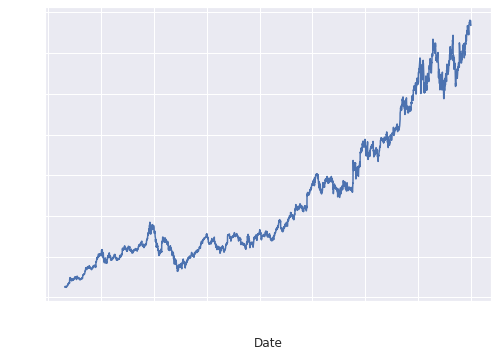

In [2]:
# getting the data 
from pandas_datareader import data
google = data.DataReader("GOOG",start="2000",end="2020",data_source="yahoo")
#we are just using the closing price
google = google["Close"]
plt.figure(figsize=(8,6))
google.plot()
plt.xticks(color="white")
plt.yticks(color="white")

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.,
        1600.]), <a list of 10 Text major ticklabel objects>)

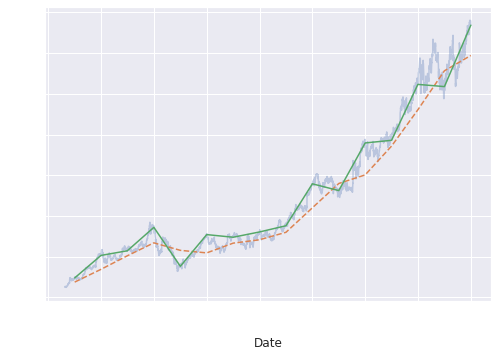

In [3]:
#resampling according to the business years
plt.figure(figsize=(8,6))
google.plot(alpha=0.3)
google.resample("BA").mean().plot(style="--")
google.asfreq("BA").plot(style="-")


* Return on investment by time shifting 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  


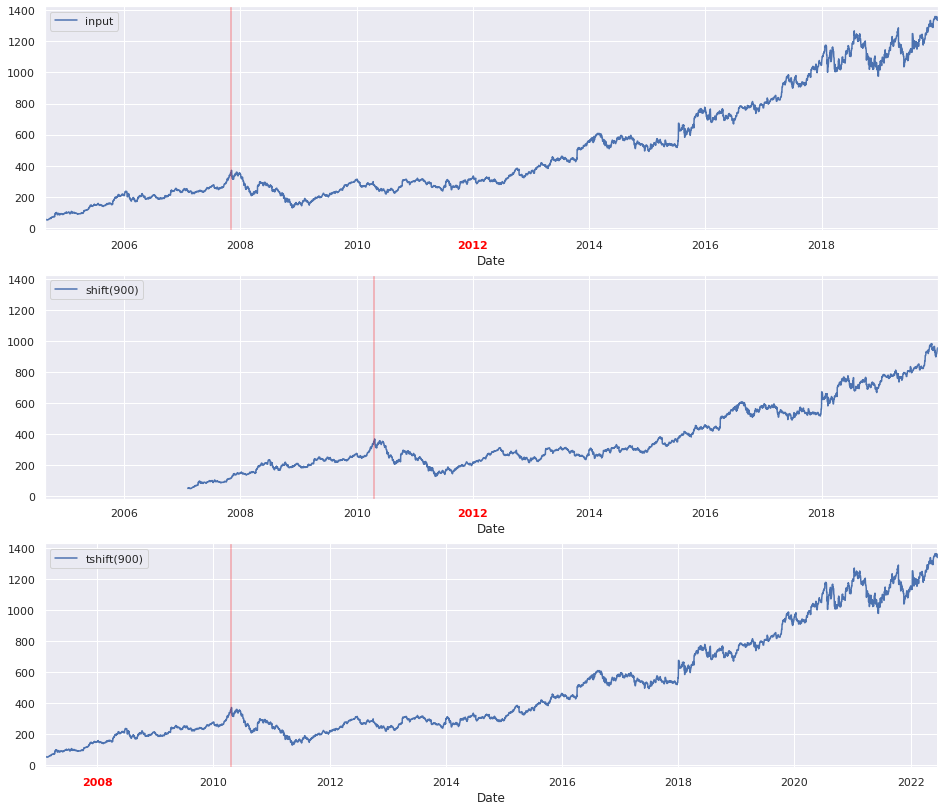

In [22]:
goog = google.copy()

fig, ax = plt.subplots(3, sharey=True)
# apply a frequency to the data
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1],figsize=(16,14))
goog.tshift(900).plot(ax=ax[2])
# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')

ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  This is separate from the ipykernel package so we can avoid doing imports until


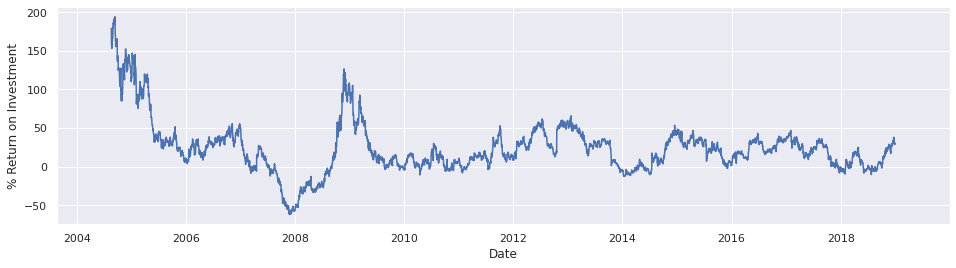

In [31]:
#roi :
plt.figure(figsize=(16,4))
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

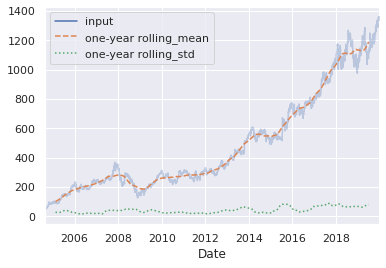

In [37]:
rolling = goog.rolling(365, center=True)
data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)